In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LogisticRegression

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


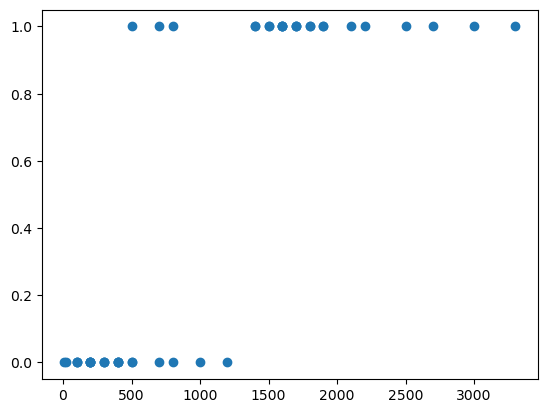

In [4]:
base = pd.read_csv('Eleicao.csv', sep=';')
plt.scatter(base.DESPESAS, base.SITUACAO)
base.describe()

In [5]:
# Visualização do coeficiente de correlação entre o atributo "despesas" e situações
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [7]:
# Criação das variáveios x e y 
# Transformação de x para o formato matriz adicionado um novo eixo
x = base.iloc[:, 2].values
x = x[:, np.newaxis]
y = base.iloc[:, 1].values
x

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]], dtype=int64)

In [11]:
# Criação de modelo, treinamento e visualização dos coeficientes
modelo = LogisticRegression()
modelo.fit(x, y)
modelo.coef_
modelo.intercept_



array([-4.60287217])

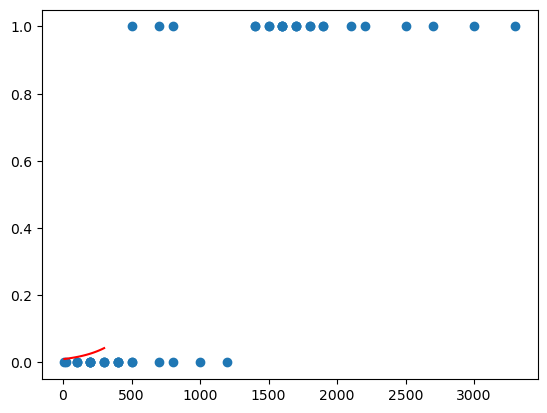

In [18]:
plt.scatter(x, y)
x_teste = np.linspace(10, 300, 100)

def model(x):
    return 1 / (1 + np.exp(-x))

r = model(x_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(x_teste, r, color = 'red')

In [24]:
# Carregamento de base de daods comosnovos candidatos
base_previsoes = pd.read_csv('NovosCandidatos2.csv', sep=';')
base_previsoes

,CANDIDATO,DESPESAS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,A,0,NaN,NaN,NaN,NaN
1,B,10000,NaN,NaN,NaN,NaN
2,C,200,NaN,NaN,NaN,NaN
3,D,500,NaN,NaN,NaN,NaN
4,E,900,NaN,NaN,NaN,NaN
5,F,1500,NaN,NaN,NaN,NaN
6,G,3000,NaN,NaN,NaN,NaN
7,H,150,NaN,NaN,NaN,NaN


In [26]:
despesas = base_previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)
previsoes_teste = modelo.predict(despesas)
previsoes_teste

array([0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [27]:
base_previsoes = np.column_stack([base_previsoes, previsoes_teste])
base_previsoes

array([['A', 0, nan, nan, nan, nan, 0],
       ['B', 10000, nan, nan, nan, nan, 1],
       ['C', 200, nan, nan, nan, nan, 0],
       ['D', 500, nan, nan, nan, nan, 0],
       ['E', 900, nan, nan, nan, nan, 0],
       ['F', 1500, nan, nan, nan, nan, 1],
       ['G', 3000, nan, nan, nan, nan, 1],
       ['H', 150, nan, nan, nan, nan, 0]], dtype=object)